# Pymaceuticals Inc.
---

### Analysis

Pymaceuticals Inc., is a new pharmaceutical company that specializes in anti-cancer medications. Recently, it began screening for potential treatments for squamous cell carcinoma (SCC), a commonly occurring form of skin cancer.

- This analysis is conducted on the complete test data from their most recent animal study.
    - In this study, 249 mice who were identified with SCC tumors received treatment with a range of drug regimens.
    - Over the course of 45 days, tumor development was observed and measured.
    - The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens.
          
- A combined study results dataframe is created as a first step. This dataframe has results from both the test data csv files ("Mouse_metadata.csv" and "Study_results.csv")
      
- We need to clean the data by identifying the duplicate MouseID and making sure our data is uniquely identified by Mouse ID and Timepoint. Finally, we create a clean DataFrame by dropping the duplicate mouse by its ID.
      
- The mice count in the clean dataframe is 248 after removing duplicates. 
    
- The next step is to generate summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen.
    
- We then generate bar plots showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas and do the same exercise using pyplot as well.
    
- We also generate a pie plot showing the distribution of female versus male mice using Pandas and pyplots.
    
- Quartiles, Outliers and Boxplots are calculated that helps us generate a box plot that shows the distrubution of the tumor volume for each treatment group.
    
- Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin.
    
- Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen.
    
- Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen.
    
- Final analysis, deductions and conclusions based on all the above graphs and correlation coefficient is documented at the end of this notebook after all the calculations are completed.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_study_results = pd.merge(study_results, mouse_metadata, how="left")

# Display the data table for preview
complete_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a203,40,63.593490,2,Infubinol,Female,20,23
2,a203,35,61.931650,2,Infubinol,Female,20,23
3,a203,30,59.523197,1,Infubinol,Female,20,23
4,a203,25,56.793208,1,Infubinol,Female,20,23


In [2]:
# Checking the number of mice.
count_of_mice = len(pd.unique(complete_study_results['Mouse ID']))
count_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = complete_study_results.loc[complete_study_results.duplicated
                                      (subset=['Mouse ID','Timepoint',]),'Mouse ID'].unique()
duplicate

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
get_duplicate_rows = complete_study_results.loc[complete_study_results['Mouse ID'] == duplicate[0] ]
get_duplicate_rows

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
586,g989,35,62.570880,2,Propriva,Female,21,26
587,g989,30,59.082294,1,Propriva,Female,21,26
588,g989,25,56.045564,1,Propriva,Female,21,26
589,g989,20,55.326122,1,Propriva,Female,21,26
590,g989,20,54.657650,1,Propriva,Female,21,26
591,g989,15,51.325852,1,Propriva,Female,21,26
592,g989,15,53.442020,0,Propriva,Female,21,26
593,g989,10,51.745156,0,Propriva,Female,21,26
594,g989,10,49.880528,0,Propriva,Female,21,26
595,g989,5,48.786801,0,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_study_results = complete_study_results[complete_study_results['Mouse ID'].isin(duplicate)==False]
clean_study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a203,40,63.593490,2,Infubinol,Female,20,23
2,a203,35,61.931650,2,Infubinol,Female,20,23
3,a203,30,59.523197,1,Infubinol,Female,20,23
4,a203,25,56.793208,1,Infubinol,Female,20,23


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_results["Mouse ID"].value_counts())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
tumor_volume_mean = clean_study_results.groupby('Drug Regimen').describe()['Tumor Volume (mm3)']['mean'].values
tumor_volume_median = clean_study_results.groupby('Drug Regimen').describe()['Tumor Volume (mm3)']['50%'].values
tumor_volume_variance = clean_study_results.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
tumor_volume_std = clean_study_results.groupby('Drug Regimen').describe()['Tumor Volume (mm3)']['std'].values
tumor_volume_sem = clean_study_results.groupby('Drug Regimen')["Tumor Volume (mm3)"].sem()

stats_df = pd.DataFrame({"Mean Tumor Volume": tumor_volume_mean, 
                                    "Median Tumor Volume":tumor_volume_median, 
                                    "Tumor Volume Variance":tumor_volume_variance,
                                    "Tumor Volume Std. Dev.": tumor_volume_std,
                                    "Tumor Volume Std. Err.": tumor_volume_sem
                                    })

stats_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
aggregated_stats =  clean_study_results.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
aggregated_stats

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

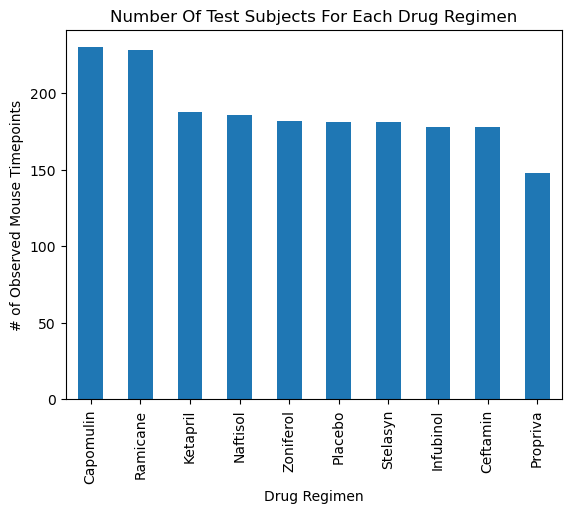

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Create a series using the 'Drug Regimen' column. Then count number of data points for each Drug Regimen 

bar_graph = clean_study_results["Drug Regimen"].value_counts().plot(kind="bar",
                  title="Number Of Test Subjects For Each Drug Regimen",
                  xlabel="Drug Regimen",
                  ylabel="# of Observed Mouse Timepoints",
                  color='tab:blue')

# Save the graph in the output folder
plt.savefig("output_data/Bar_Graph1.png")

In [10]:
# To use the arange function for x-axis
import numpy as np

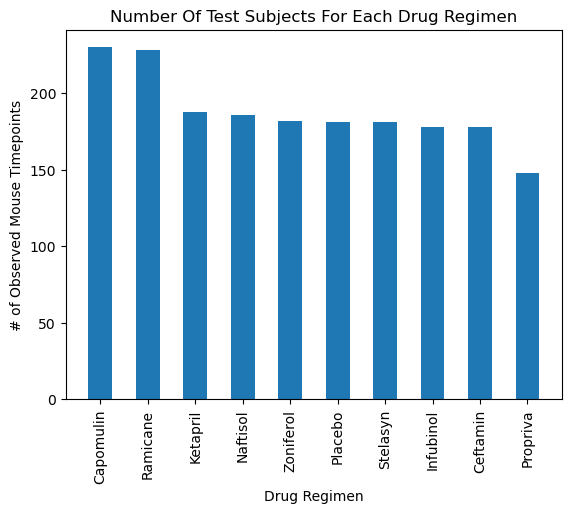

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Calculate the amount of data points for each drug regimen
drugs = clean_study_results['Drug Regimen'].value_counts().keys()
mouse = clean_study_results['Drug Regimen'].value_counts().values
# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(drugs))

# Generate a bar blot with the length of the 'counts' series
# as the amount of values on the x axis, and the corresponding values
# in the series as the y values
plt.bar(drugs, mouse, width = 0.5)


plt.title('Number Of Test Subjects For Each Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xlabel('Drug Regimen')
plt.xticks(x_axis, rotation='vertical')

# Save the graph in the output folder
plt.savefig("output_data/Bar_Graph2.png")

plt.show()


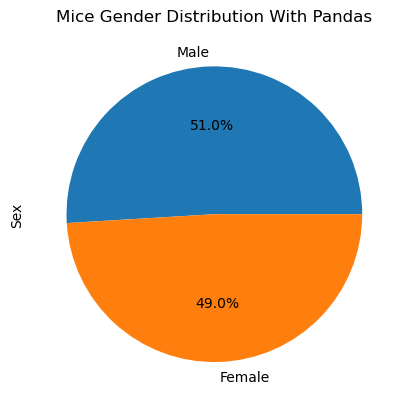

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
pie_chart = clean_study_results["Sex"].value_counts().plot(kind="pie",
                  title="Mice Gender Distribution With Pandas",
                  ylabel="Sex", autopct = "%1.1f%%")

# Save the graph in the output folder
plt.savefig("output_data/Pie1.png")

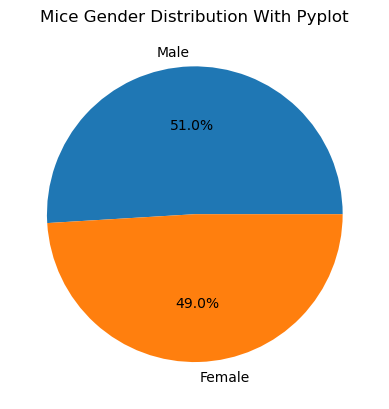

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_data = clean_study_results["Sex"].value_counts()

plt.pie(gender_data, labels=gender_data.index.values, autopct="%1.1f%%")
plt.title("Mice Gender Distribution With Pyplot")

# Save the graph in the output folder
plt.savefig("output_data/Pie2.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Start by getting the last (greatest) timepoint for each mouse
max_timepoint_df = pd.DataFrame(clean_study_results.groupby('Mouse ID')['Timepoint']
                                .max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max_Timepoint'})

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(clean_study_results, max_timepoint_df, on = 'Mouse ID' )

# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_df= merged_df.loc[(merged_df['Timepoint'] == merged_df['Max_Timepoint']) & 
                                           (merged_df['Drug Regimen'].isin(drugs))]

In [16]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
        
    # Locate the rows which contain mice on each drug and get the tumor volumes
    filtered_df= final_tumor_df.loc[final_tumor_df['Drug Regimen'] == drug]
    # add subset 
    tumor_values = filtered_df['Tumor Volume (mm3)']
    tumor_volume_list.append(tumor_values)

    # Calculate the interquartile range (IQR) for each drug regimen
    quartiles = tumor_values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tumor_values.loc[(tumor_values < lower_bound) | (tumor_values > upper_bound)]
    print(f"{drug}'s potential outliers:{outliers}")
    

Capomulin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers:274    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


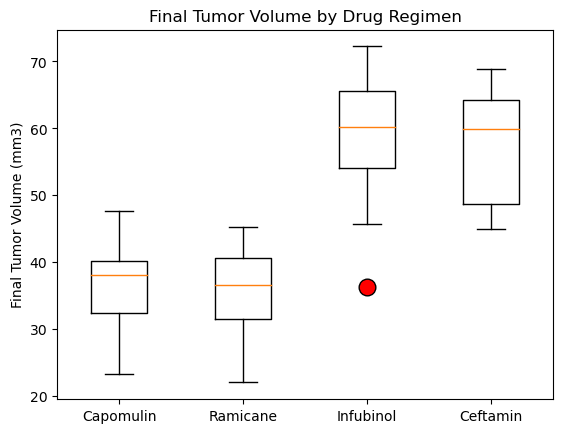

In [17]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# Format outliers on boxplot for clear visibility
format_outlier = dict(marker='o', markerfacecolor='r', markersize=12, markeredgecolor='black')

# Plot boxplot
plt.boxplot(tumor_volume_list, flierprops=format_outlier)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], drugs)

# Save the graph in the output folder
plt.savefig("output_data/Boxplot.png")

plt.show()

## Line and Scatter Plots

In [18]:
# Create a new dataframe that has mouse study data for only a single drug Capomulin
mouse_capomulin_df = clean_study_results.loc[(clean_study_results['Mouse ID'] == "l509") &
                                            (clean_study_results["Drug Regimen"] == "Capomulin")]
mouse_capomulin_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
886,l509,45,41.483008,3,Capomulin,Male,17,21
887,l509,40,40.770813,2,Capomulin,Male,17,21
888,l509,35,40.207288,2,Capomulin,Male,17,21
889,l509,30,44.708055,2,Capomulin,Male,17,21
890,l509,25,44.006257,2,Capomulin,Male,17,21
891,l509,20,48.070452,2,Capomulin,Male,17,21
892,l509,15,47.488599,1,Capomulin,Male,17,21
893,l509,10,46.759074,0,Capomulin,Male,17,21
894,l509,5,45.851193,0,Capomulin,Male,17,21
895,l509,0,45.000000,0,Capomulin,Male,17,21


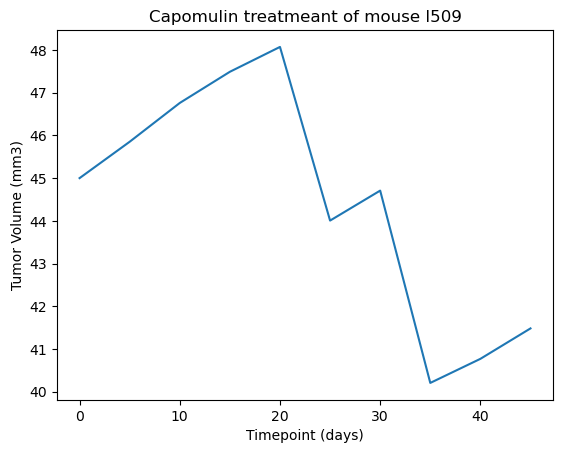

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_capomulin_df = clean_study_results.loc[(clean_study_results['Mouse ID'] == "l509") &
                                            (clean_study_results["Drug Regimen"] == "Capomulin")]
# Plot line graph
plt.plot(mouse_capomulin_df['Timepoint'],mouse_capomulin_df['Tumor Volume (mm3)'])

# Label the graph and axis
plt.title('Capomulin treatmeant of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')

# Save the graph in the output folder
plt.savefig("output_data/Linegraph.png")

plt.show()

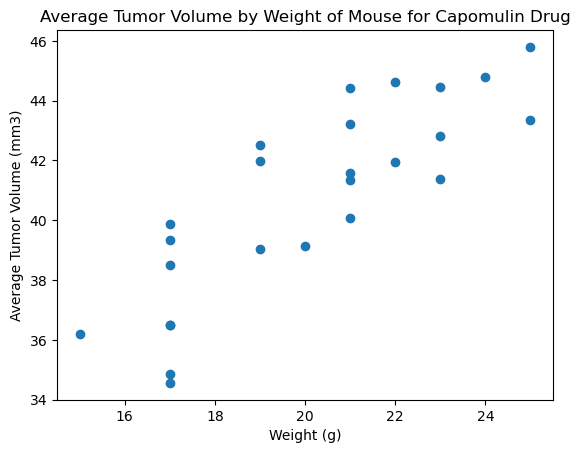

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_in_capomulin = clean_study_results.loc[(clean_study_results["Drug Regimen"] == "Capomulin")]
average_tumor_mean = pd.DataFrame(mouse_in_capomulin.groupby(['Mouse ID'])['Tumor Volume (mm3)'].mean()
.sort_values().reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'}))

merged_df = pd.merge(clean_study_results, average_tumor_mean, on='Mouse ID')
final_df = merged_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_df


# Plot scatter plot
plt.scatter(final_df['Weight (g)'],final_df['avg_tumor_vol'])

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight of Mouse for Capomulin Drug')

# Save the graph in the output folder
plt.savefig("output_data/ScatterPlot.png")

# Display scatter plot
plt.show()

## Correlation and Regression

The correlation between weight and average tumor volume
is 0.84.


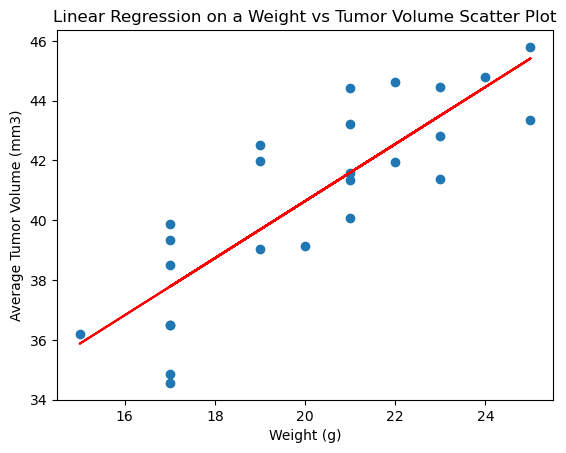

In [21]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
x_values = final_df['Weight (g)']
y_values = final_df['avg_tumor_vol']
correlation_coefficient = stats.pearsonr(x_values, y_values)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
is {round(correlation_coefficient[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# Plot linear regression on top of scatter plot
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,"r-")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Linear Regression on a Weight vs Tumor Volume Scatter Plot")

# Save the graph in the output folder
plt.savefig("output_data/LinearRegression.png")

# Plot the linear regression scatter plot
plt.show()

# Observations and Conclusions from the above Analysis

* From the bar graphs we can conclude that over 200 mice were given Capomulin and Ramicane drugs this count is high than any other type of drugs under the study scope.

* Pie charts shows us that the gender distribution of mice as test subjects was a bit more for the male mice at 51%.

* I found one outlier in the analysis for Infubinol drug.

* Capomulin and Ramicane showed better results in reducing the tumor size than the other 2 drugs Infubinol and Ceftamin.

*  The line plot of tumor volume vs. timepoint for a single mouse treated with Capomulin shows that the tumor volume decreased with a regular dose of Capomulin drug.

* The scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen indicates that as the weight of the mouse increased the average tumor volume increased too.

* The correlation coefficient and a linear regression model calculation for mouse weight and average observed tumor volume for the entire Capomulin regimen shows that there is a strong positive correlation between mouse weight and average tumor volume, it is 0.84. As the mouse weight increases, the average tumor volume increases too.